# Example of Wasserstein Distances

## 1) Simple Illustrative Example

In the simple example below, taken from paper from GAN to WGAN (and stack exchange), we show how the Wasserstein distance incorporate geometric information about the distribution shift, while the KL divergence does not. That is, the KL distance is not informative about how far the distribution shift is. The Wasserstein distance is more informative.

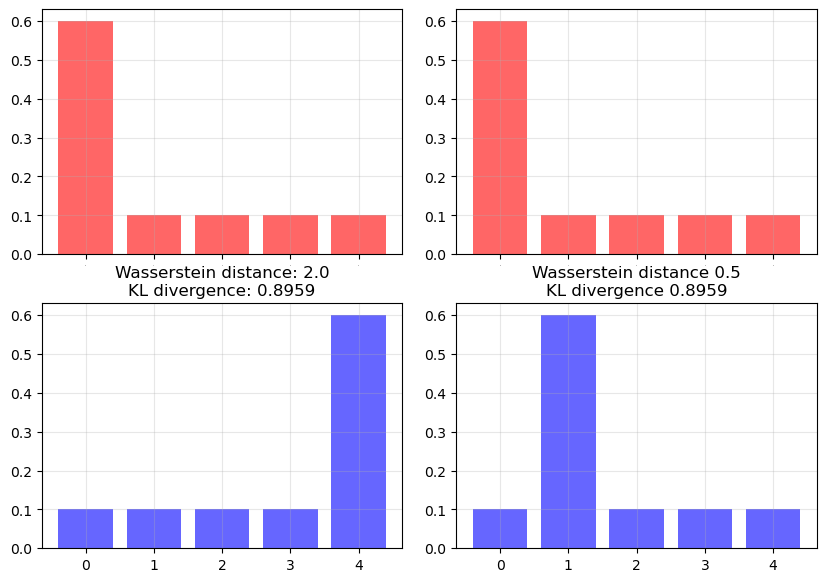

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

# define samples this way as scipy.stats.wasserstein_distance can't take probability distributions directly
sampP = [1,1,1,1,1,1,2,3,4,5]
sampQ = [1,2,3,4,5,5,5,5,5,5]
# and for scipy.stats.entropy (gives KL divergence here) we want distributions
P = np.unique(sampP, return_counts=True)[1] / len(sampP)
Q = np.unique(sampQ, return_counts=True)[1] / len(sampQ)
# compare to this sample / distribution:
sampQ2 = [1,2,2,2,2,2,2,3,4,5]
Q2 = np.unique(sampQ2, return_counts=True)[1] / len(sampQ2)


# Plot
fig = plt.figure(figsize=(10,7))
fig.subplots_adjust(wspace=0.15, hspace=0.2)

plt.subplot(2,2,1)
plt.grid(True, which='both', alpha=0.3)

plt.bar(np.arange(len(P)), P, color='r', alpha=0.6)
plt.xticks(np.arange(len(P)), np.arange(5), fontsize=0)

plt.subplot(2,2,3)
plt.grid(True, which='both', alpha=0.3)
plt.bar(np.arange(len(Q)), Q, color='b', alpha=0.6)
plt.xticks(np.arange(len(Q)), np.arange(5))
plt.title("Wasserstein distance: {:.4}\nKL divergence: {:.4}".format(
    scipy.stats.wasserstein_distance(sampP, sampQ), scipy.stats.entropy(P, Q)), fontsize=12)

plt.subplot(2,2,2)
plt.grid(True, which='both', alpha=0.3)
plt.bar(np.arange(len(P)), P, color='r', alpha=0.6)
plt.xticks(np.arange(len(P)), np.arange(5), fontsize=0)

plt.subplot(2,2,4)
plt.grid(True, which='both', alpha=0.3)
plt.bar(np.arange(len(Q2)), Q2, color='b', alpha=0.6)
plt.xticks(np.arange(len(Q2)), np.arange(5))
plt.title("Wasserstein distance {:.4}\nKL divergence {:.4}".format(
    scipy.stats.wasserstein_distance(sampP, sampQ2), scipy.stats.entropy(P, Q2)), fontsize=12)
plt.show()

## 2) Ordinal Classification Example with Semantic Shift

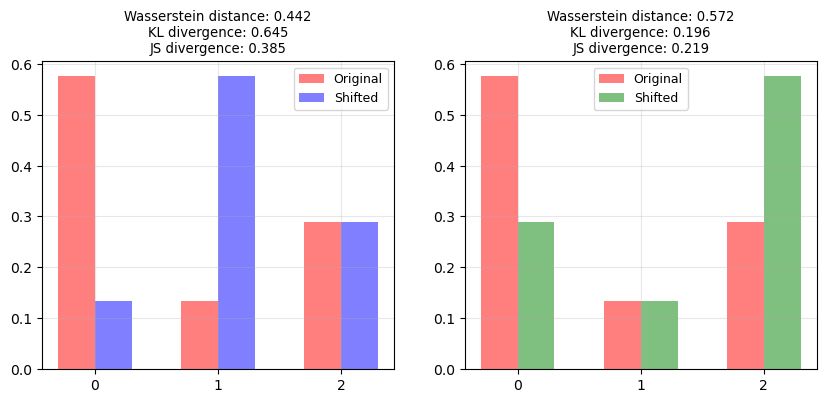

In [3]:
# Create synthetic data for ordinal classification
import torch
import numpy as np
import matplotlib.pyplot as plt
from utils.utils import create_ordinal, ordinal_shift
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
np.random.seed(3)
torch.manual_seed(3)

# Create synthetic data
X, y = create_ordinal(N=500, P=2)
y_near = ordinal_shift(y, shift_type='Near')
y_far = ordinal_shift(y, shift_type='Far')

# Plot
fig = plt.figure(figsize=(10,4))
fig.subplots_adjust(wspace=0.2, hspace=0)


# Near shift
plt.subplot(1,2,1)
plt.grid(True, which='both', alpha=0.3)

# Plot probability bar for classes in y_train
P = np.unique(y, return_counts=True)[1] / len(y)
plt.bar(np.arange(len(P)) - .15, P, color='r', alpha=0.5, label='Original', width=0.3)
plt.xticks(np.arange(len(P)), np.unique(y.int()), fontsize=10)
plt.title("\nOriginal Y Ordinal Class\n", fontsize=12)

P_near = np.unique(y_near, return_counts=True)[1] / len(y_near)
plt.bar(np.arange(len(P_near)) + .15, P_near, color='b', alpha=0.5, label='Shifted', width=0.3)
plt.xticks(np.arange(len(P_near)), np.unique(y_near.int()), fontsize=10)
plt.title("Wasserstein distance: {:.4}\nKL divergence: {:.4}\nJS divergence: {:.4}".format(scipy.stats.wasserstein_distance(y, y_near).__round__(3), scipy.stats.entropy(P, P_near).round(3), scipy.spatial.distance.jensenshannon(P, P_near).round(3)), fontsize=9.5)
plt.legend(fontsize=9)

# Far shift
plt.subplot(1,2,2)
plt.grid(True, which='both', alpha=0.3)

# Plot probability bar for classes in y_train
P = np.unique(y, return_counts=True)[1] / len(y)
plt.bar(np.arange(len(P)) - .15, P, color='r', alpha=0.5, label='Original', width=0.3)
plt.xticks(np.arange(len(P)), np.unique(y.int()), fontsize=10)
plt.title("\nOriginal Y Ordinal Class\n", fontsize=12)

# Plot probability bar for classes in y_OOD
P_far = np.unique(y_far, return_counts=True)[1] / len(y_far)
plt.bar(np.arange(len(P_far)) + .15, P_far, color='g', alpha=0.5, label='Shifted', width=0.3)
plt.xticks(np.arange(len(P_far)), np.unique(y_far.int()), fontsize=10)
plt.title("Wasserstein distance: {:.4}\nKL divergence: {:.4}\nJS divergence: {:.4}".format(scipy.stats.wasserstein_distance(y, y_far).__round__(3), scipy.stats.entropy(P, P_far).round(3), scipy.spatial.distance.jensenshannon(P, P_far).round(3)), fontsize=9.5)
plt.legend(fontsize=9)

# Save figure
plt.savefig('images/ordinal_shift.pdf', dpi=300)